#**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#**Import Dataset**

In [ ]:
#df = pd.read_csv("Heart_Disease_Project/data/heart_disease.csv")
df = pd.read_csv("/content/heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,0,2,150.0,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108.0,1,1.5,2,2.5,3.0,1
2,67,1,4,120,229,0,2,129.0,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187.0,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172.0,0,1.4,1,0.0,3.0,0


#**Checking Nulls**

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#**Heatmap to Visualize**

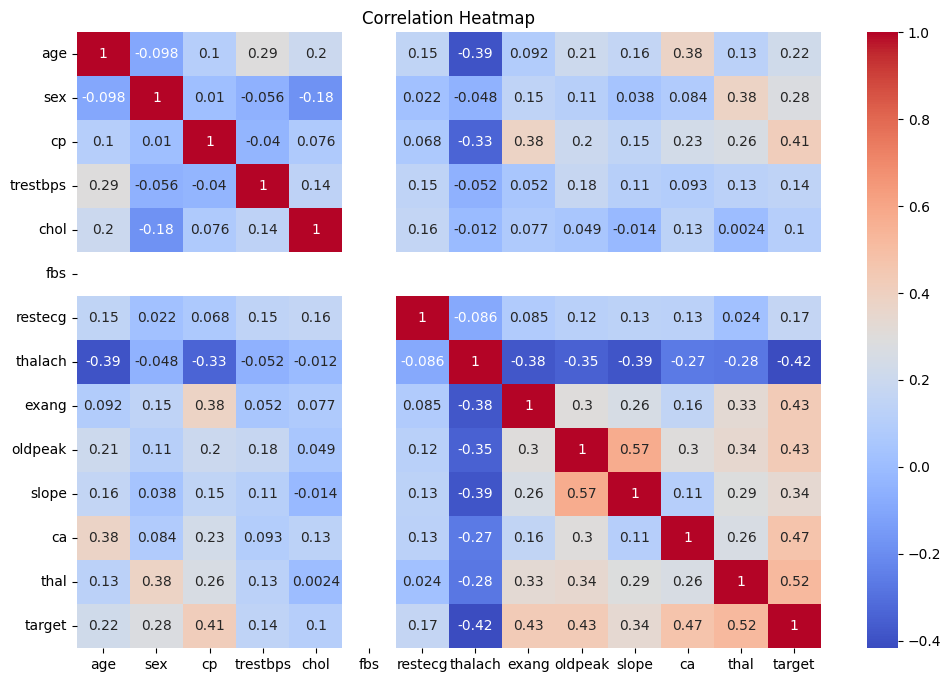

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#**SelectKBest Important Features**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop("target", axis=1)
y = df["target"]

selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


#**RandomForest Important Features**

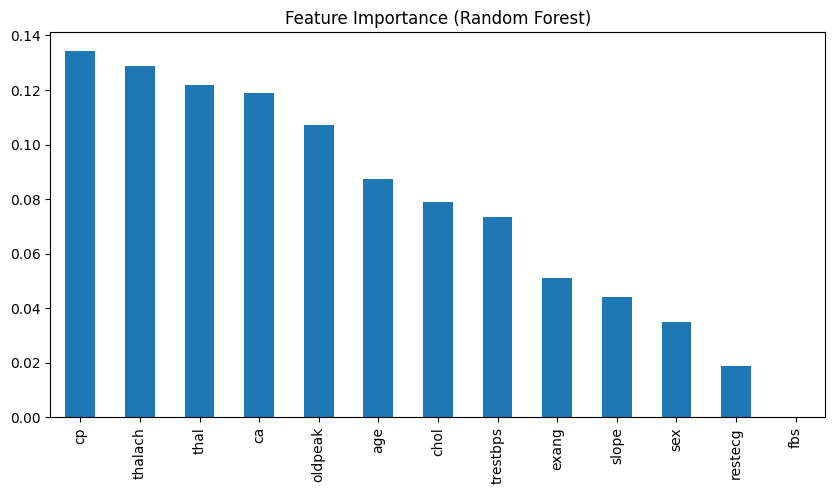

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Feature Importance (Random Forest)")
plt.show()


#**Save The New Datasets**

In [ ]:
# SelectKBest
df_selected = df[['sex','cp','thalach','exang','oldpeak','slope','ca','thal','target']]
df_selected.to_csv("heart_disease_selected.csv", index=False)

# RandomForest top 8
top_features = ['cp','thalach','thal','ca','oldpeak','age','chol','trestbps']
df_rf_selected = df[top_features + ['target']]
df_rf_selected.to_csv("heart_disease_rf_selected.csv", index=False)
